# 题目一
使用波士顿房价数据集，建立并训练回归模型，预测房价。
要求：

⑴ 使用波士顿房价数据集中的“低收入人口比例”属性，训练和测试一元线性回归模型。并可视化显示数据和模型。

In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

#下载波士顿房价数据集，并将所有训练集数据读取到NumPy数组x和y中
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


(1) 使用波士顿房价数据集中的“低收入人口比例”属性，训练和测试一元线性回归模型。并可视化显示数据和模型。

i: 0, Loss: 110.696159, w: -0.555655, b: 39.310318
i: 10, Loss: 76.200104, w: -0.961568, b: 39.245590
i: 20, Loss: 75.744087, w: -0.996971, b: 39.203197
i: 30, Loss: 75.580750, w: -0.998070, b: 39.162964
i: 40, Loss: 75.420677, w: -0.995997, b: 39.123016
i: 50, Loss: 75.261383, w: -0.993636, b: 39.083183
i: 60, Loss: 75.102859, w: -0.991253, b: 39.043442
i: 70, Loss: 74.945084, w: -0.988873, b: 39.003799
i: 80, Loss: 74.788078, w: -0.986498, b: 38.964249
i: 90, Loss: 74.631821, w: -0.984130, b: 38.924797
i: 100, Loss: 74.476303, w: -0.981767, b: 38.885437


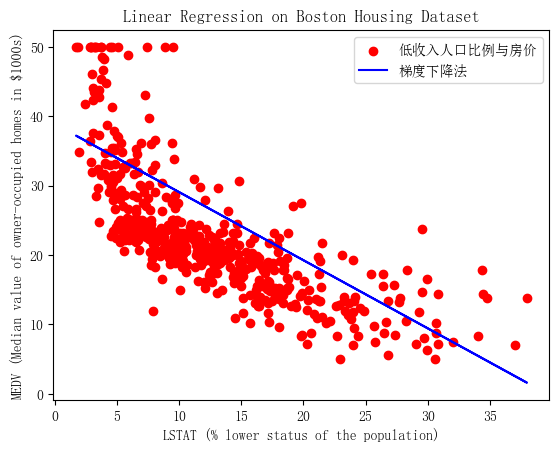

In [15]:
lstat = data[:, np.newaxis, 12]  # 选择LSTAT属性
price = target                   # 目标变量（房价）

# x = (lstat - lstat.min())/(lstat.max() - lstat.min())
# y = (price - price.min())/(price.max() - price.min())
x = lstat
y = price

w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn()+40)

# 超参数
learn_rate = 0.001
iter = 100
display_step = 10

# 训练模型
mse = []
for i in range(iter + 1):
    with tf.GradientTape() as tape:
        pred = w*x+b
        loss = 0.5*tf.reduce_mean(tf.square(y-pred))
    dL_dw, dL_db = tape.gradient(loss, [w,b])
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    # 记录损失值
    mse.append(loss)
    if i % display_step == 0:
        print("i: %i, Loss: %f, w: %f, b: %f" %(i, mse[i], w, b))

plt.rcParams['font.family'] = ['SimSun']  # 'SimSun' 是宋体字体的名称
# 可视化训练结果
plt.figure()
plt.scatter(x, y, color="red", label="低收入人口比例与房价")
plt.plot(x, pred, color="blue", label="梯度下降法")
plt.xlabel("LSTAT (% lower status of the population)")
plt.ylabel("MEDV (Median value of owner-occupied homes in $1000s)")
plt.title('Linear Regression on Boston Housing Dataset')
plt.legend()
plt.show()

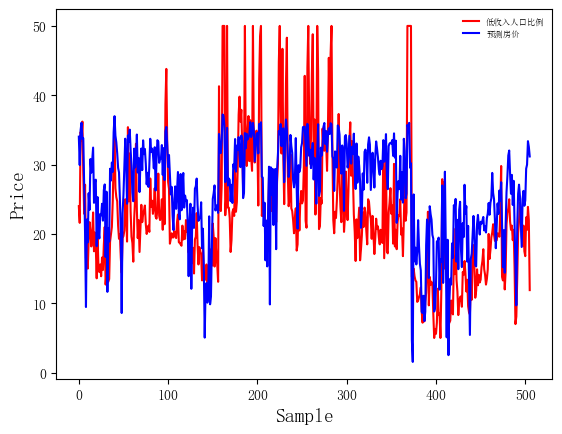

In [3]:
plt.figure()
plt.plot(y, color="red", label="低收入人口比例")
plt.plot(pred, color="blue", label="预测房价")
plt.xlabel("Sample",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.legend(fontsize=6, frameon=0)
plt.show()

Mean Squared Error: 38.48296722989415
Predict Formula: y = -0.9500493537579905 * x + 34.5538408793831


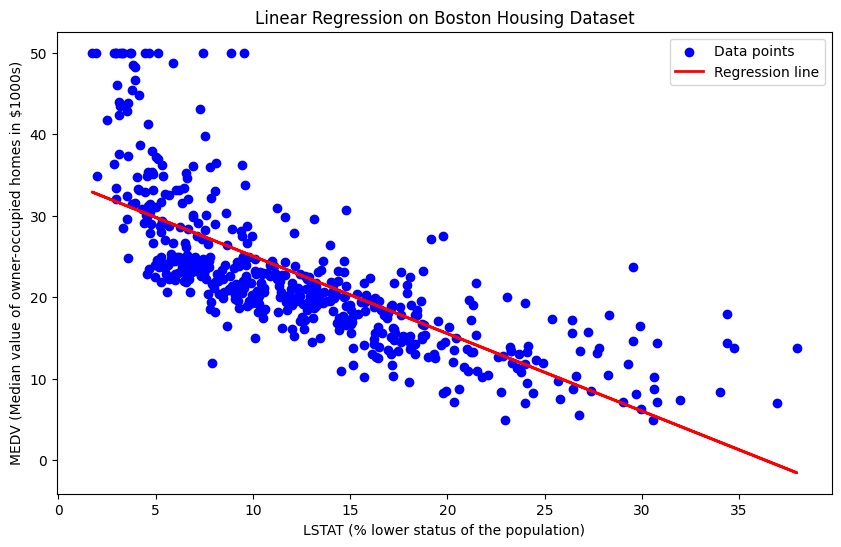

In [4]:
x = data[:, np.newaxis, 12]  # 选择LSTAT属性
y = target                   # 目标变量（房价）

# 创建和训练线性回归模型
model = LinearRegression()
model.fit(x, y)

# 使用测试集进行预测
y_pred = model.predict(x)
# 计算均方误差
mse = mean_squared_error(y, y_pred)
# mse = mean_squared_error(x_train, x_train)
print(f'Mean Squared Error: {mse}')

# 查看模型的系数和截距
coeff = model.coef_[0]
intercept = model.intercept_
print(f'Predict Formula: y = {coeff} * x + {intercept}')

# 设置Matplotlib的字体为DejaVu Sans
plt.rcParams['font.family'] = 'DejaVu Sans'
# 可视化显示数据和模型
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('LSTAT (% lower status of the population)')
plt.ylabel('MEDV (Median value of owner-occupied homes in $1000s)')
plt.title('Linear Regression on Boston Housing Dataset')
plt.legend()
plt.show()

⑵ 使用波士顿房价数据集中的所有属性，训练和测试多元线性回归模型，并可视化显示数据和模型。

In [70]:
x = data    # 选择LSTAT属性
y = target  # 目标变量（房价）

# 对每个特征进行归一化处理
for i in range(x.shape[1]):
    feature_min = data[:, i].min()  # 特征的最小值
    feature_max = data[:, i].max()  # 特征的最大值
    x[:, i] = (data[:, i] - feature_min) / (feature_max - feature_min)

print(x.shape, y.shape)
X = np.hstack((np.ones((len(data), 1)), x))
Y = y.reshape(-1, 1)

# 设置超参数
learning_rate = 0.01
iter = 200000
display_step = 10

W = tf.Variable(np.random.randn(x.shape[1]+1 , 1))

mse = []
for i in range(0, iter+1):
    with tf.GradientTape() as tape: # 创建一个 GradientTape 对象 tape
        Pred = tf.matmul(X,W)       # 记录张量运算, 以便后续计算梯度
        Loss = 0.5*tf.reduce_mean(tf.square(Y-Pred))
    
    mse.append(Loss)

    dL_dW = tape.gradient(Loss, W)
    W.assign_sub(learn_rate * dL_dW)

    if i % display_step == 0:
        print("i: %i, Loss: %f" %(i, Loss))
print(Pred.shape)


(506, 13) (506,)
i: 0, Loss: 326.637948
i: 10, Loss: 306.942666
i: 20, Loss: 288.666799
i: 30, Loss: 271.707130
i: 40, Loss: 255.967949
i: 50, Loss: 241.360515
i: 60, Loss: 227.802545
i: 70, Loss: 215.217743
i: 80, Loss: 203.535367
i: 90, Loss: 192.689821
i: 100, Loss: 182.620285
i: 110, Loss: 173.270365
i: 120, Loss: 164.587770
i: 130, Loss: 156.524015
i: 140, Loss: 149.034143
i: 150, Loss: 142.076469
i: 160, Loss: 135.612342
i: 170, Loss: 129.605922
i: 180, Loss: 124.023978
i: 190, Loss: 118.835697
i: 200, Loss: 114.012508
i: 210, Loss: 109.527920
i: 220, Loss: 105.357368
i: 230, Loss: 101.478075
i: 240, Loss: 97.868922
i: 250, Loss: 94.510326
i: 260, Loss: 91.384128
i: 270, Loss: 88.473492
i: 280, Loss: 85.762805
i: 290, Loss: 83.237591
i: 300, Loss: 80.884426
i: 310, Loss: 78.690865
i: 320, Loss: 76.645364
i: 330, Loss: 74.737224
i: 340, Loss: 72.956519
i: 350, Loss: 71.294050
i: 360, Loss: 69.741282
i: 370, Loss: 68.290304
i: 380, Loss: 66.933781
i: 390, Loss: 65.664907
i: 400, Lo

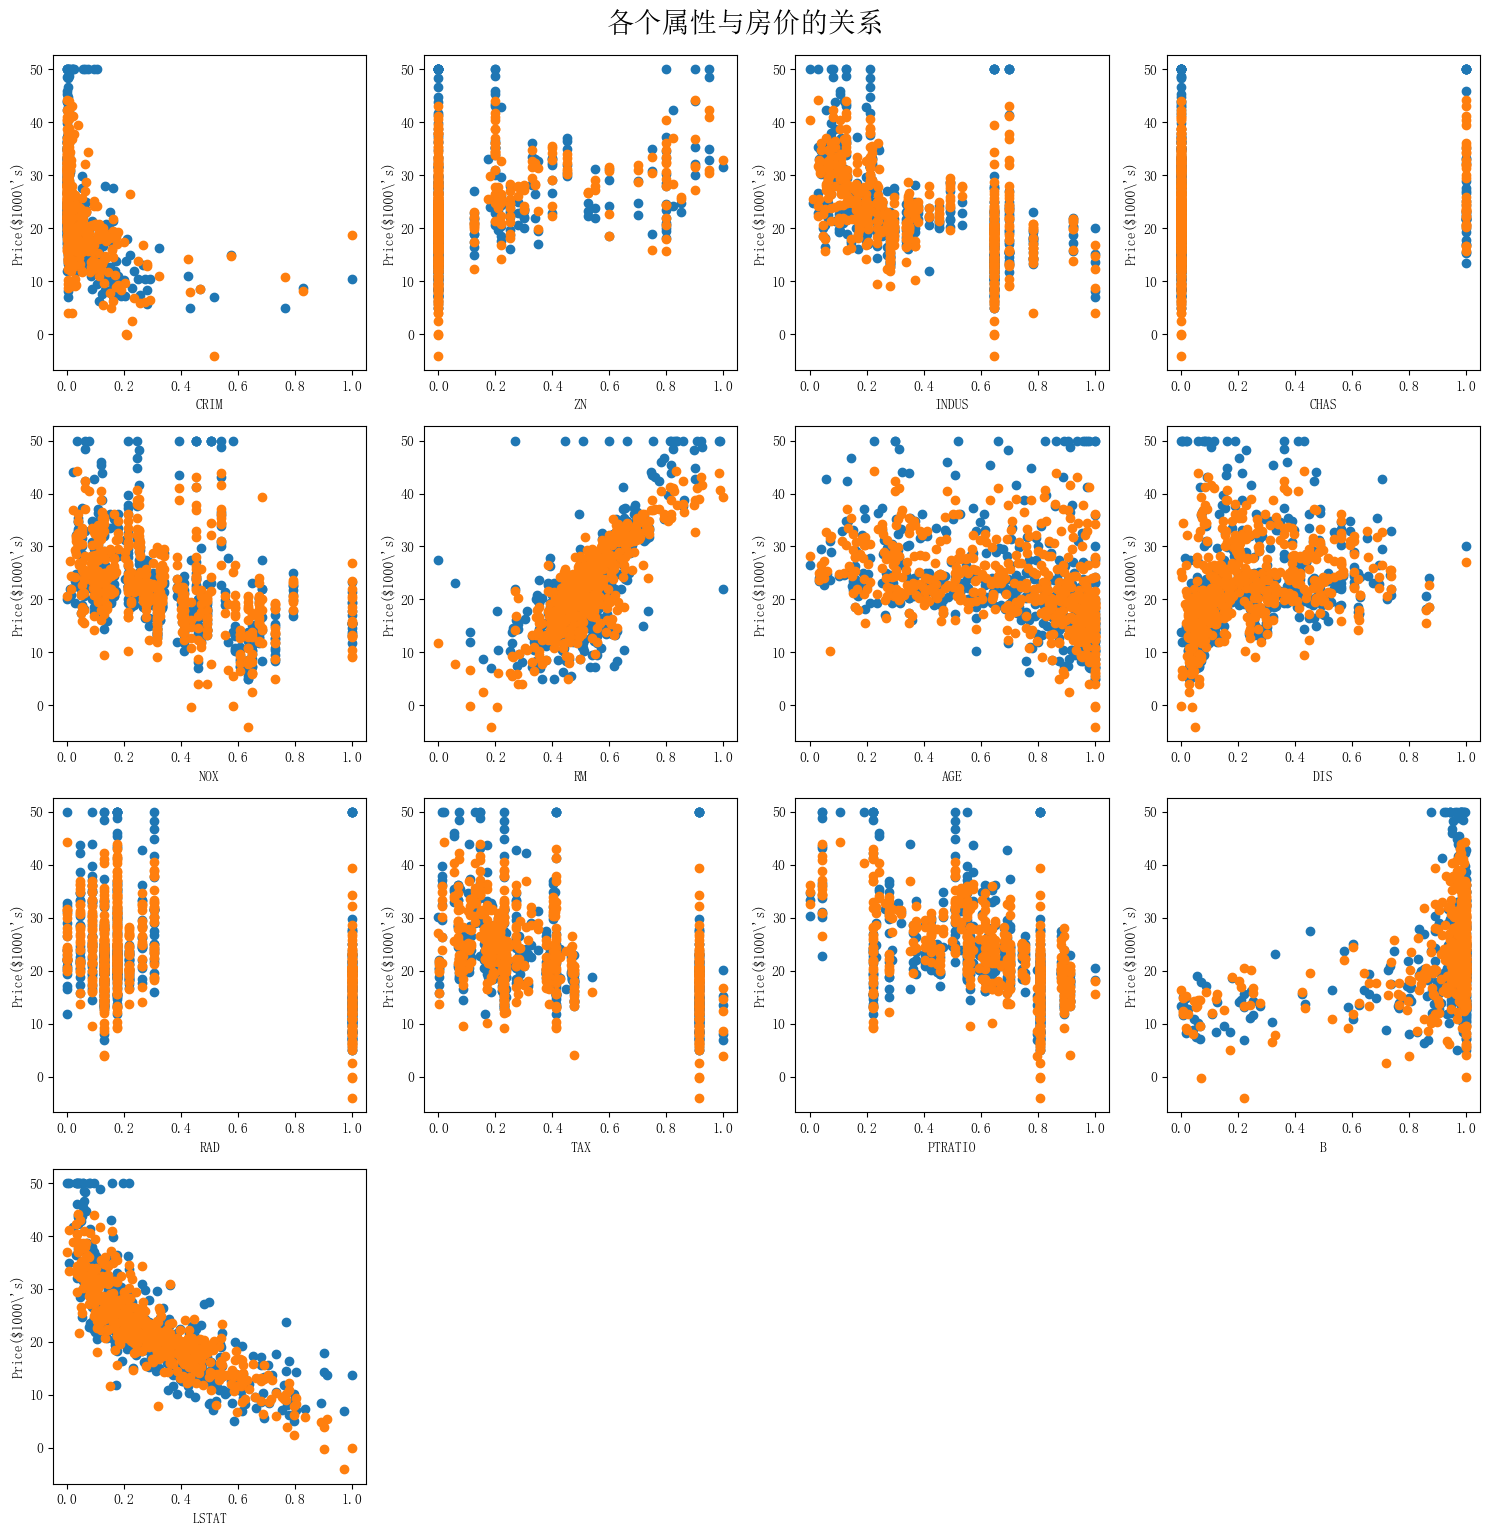

In [72]:
# 特征名称
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

# 创建包含每个属性与房价之间关系的散点图
plt.figure(figsize=(15, 15))
for i, feature_name in enumerate(feature_names, start=0):
    plt.subplot(4, 4, i+1)  # 划分 4x4的网格
    plt.scatter(x[:, i], y)
    plt.scatter(x[:, i], Pred)
    plt.xlabel(feature_name)
    plt.ylabel("Price($1000\\'s)")
plt.tight_layout()
plt.suptitle("各个属性与房价的关系", x=0.5, y=1.02, fontsize=20)
plt.show()

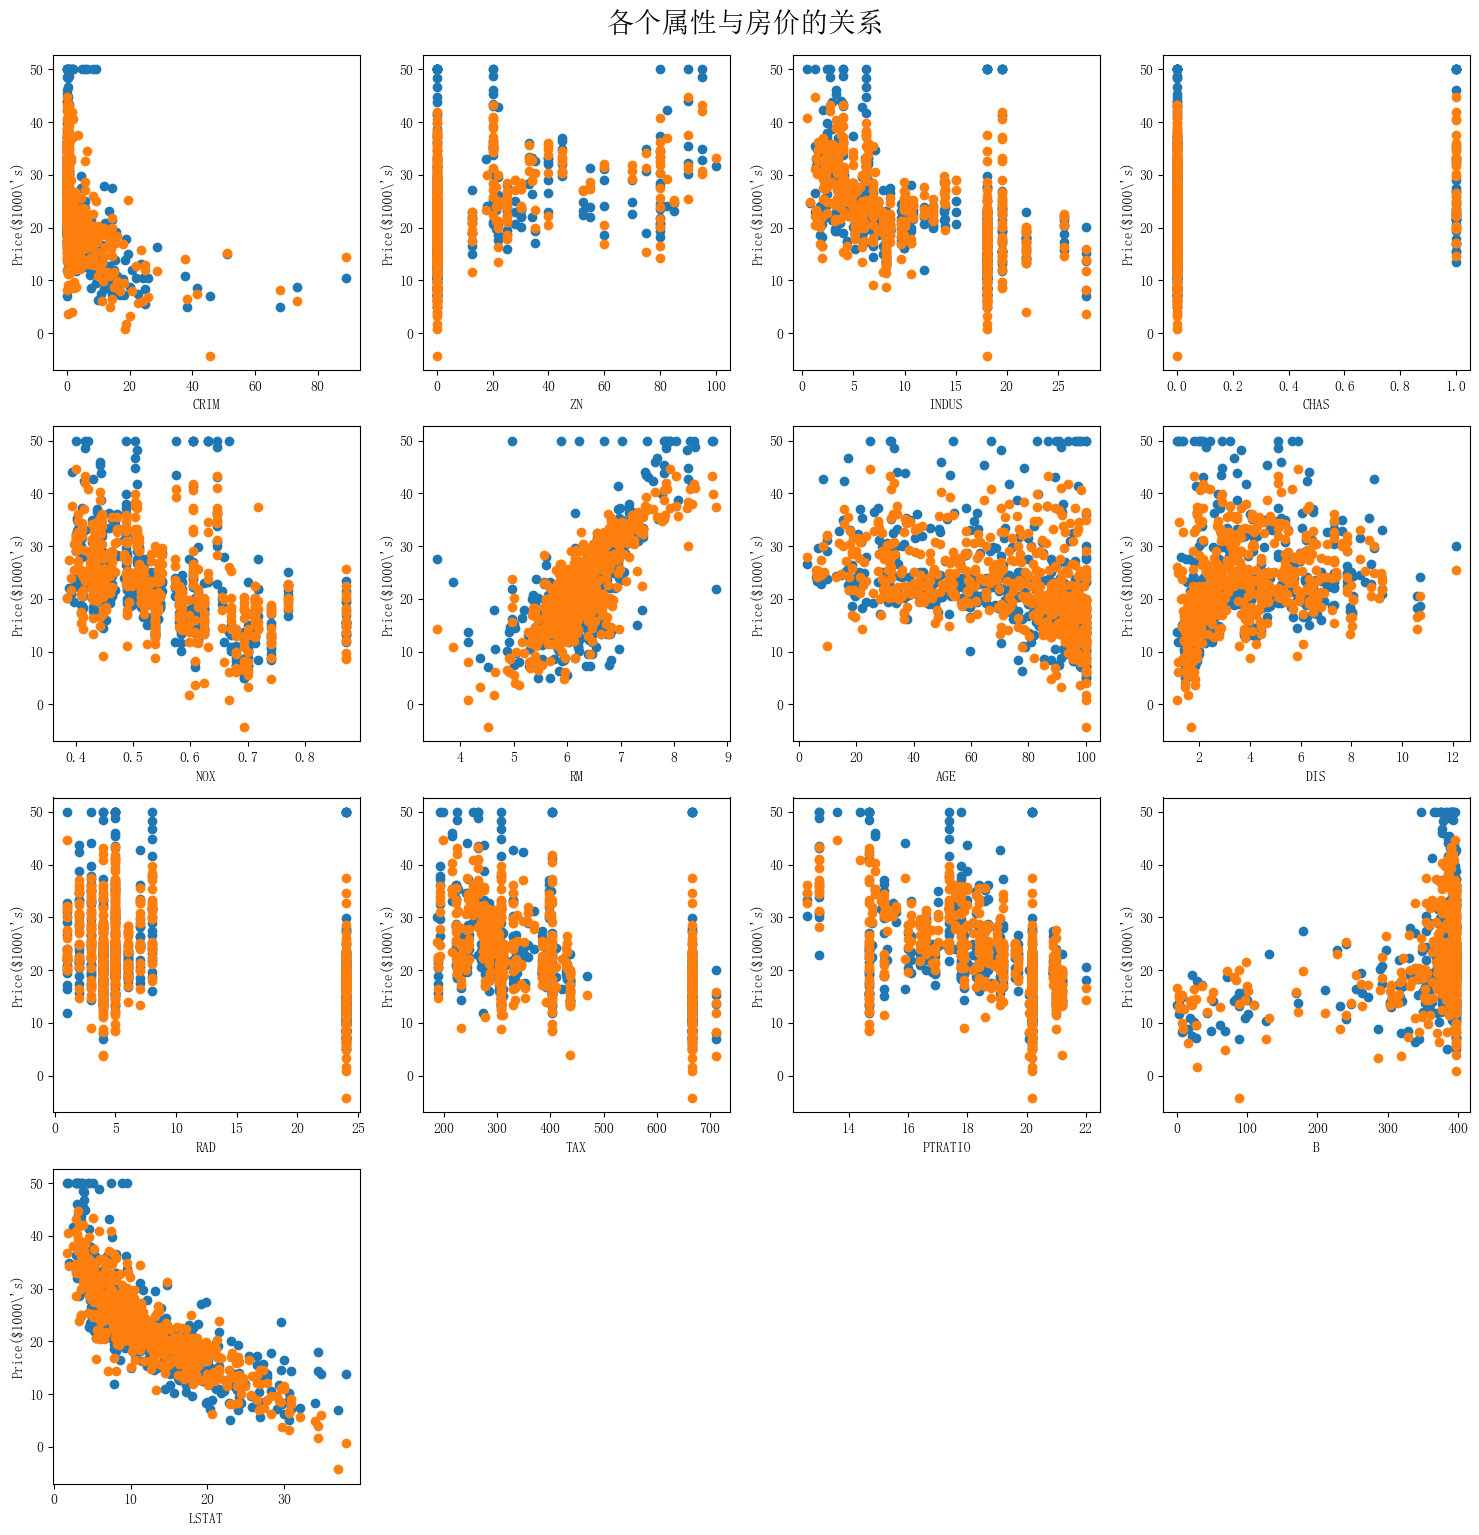

In [12]:
x = data    # 选择LSTAT属性
y = target  # 目标变量（房价）

model = LinearRegression()
model.fit(x, y)

# 预测
Pred = model.predict(x)
# 创建包含每个属性与房价之间关系的散点图
plt.figure(figsize=(15, 15))
for i, feature_name in enumerate(boston.feature_names, start=0):
    plt.subplot(4, 4, i+1)  # 划分 4x4的网格
    plt.scatter(x[:, i], y)
    plt.scatter(x[:, i], Pred)
    plt.xlabel(feature_name)
    plt.ylabel("Price($1000\\'s)")
plt.tight_layout()
plt.suptitle("各个属性与房价的关系", x=0.5, y=1.02, fontsize=20)
plt.show()


⑶ 根据6.4节中波士顿房价数据集的可视化结果，选择对房价影响较大的几个属性，训练和测试多元线性回归模型，并可视化模型。

In [68]:
select = [0,4,5,6,7,12]
selected_x = data[:, select]    # 选择LSTAT属性
print(selected_x)
y = target  # 目标变量（房价）
# 特征名称
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
selected_feature_names = [feature_names[i] for i in select]

# 对每个特征进行归一化处理
for i in range(selected_x.shape[1]):
    feature_min = selected_x[:, i].min()  # 特征的最小值
    feature_max = selected_x[:, i].max()  # 特征的最大值
    selected_x[:, i] = (selected_x[:, i] - feature_min) / (feature_max - feature_min)

X = np.hstack((np.ones((len(data), 1)), selected_x))
Y = y.reshape(-1, 1)

# 设置超参数
learning_rate = 0.01
iter = 20000
display_step = 10

W = tf.Variable(np.random.randn(X.shape[1] , 1))

mse = []
for i in range(0, iter+1):
    with tf.GradientTape() as tape: # 创建一个 GradientTape 对象 tape
        Pred = tf.matmul(X,W)       # 记录张量运算, 以便后续计算梯度
        Loss = 0.5*tf.reduce_mean(tf.square(Y-Pred))
    
    mse.append(Loss)

    dL_dW = tape.gradient(Loss, W)
    W.assign_sub(learn_rate * dL_dW)

    if i % display_step == 0:
        print("i: %i, Loss: %f" %(i, Loss))

[[6.3200e-03 5.3800e-01 6.5750e+00 6.5200e+01 4.0900e+00 4.9800e+00]
 [2.7310e-02 4.6900e-01 6.4210e+00 7.8900e+01 4.9671e+00 9.1400e+00]
 [2.7290e-02 4.6900e-01 7.1850e+00 6.1100e+01 4.9671e+00 4.0300e+00]
 ...
 [6.0760e-02 5.7300e-01 6.9760e+00 9.1000e+01 2.1675e+00 5.6400e+00]
 [1.0959e-01 5.7300e-01 6.7940e+00 8.9300e+01 2.3889e+00 6.4800e+00]
 [4.7410e-02 5.7300e-01 6.0300e+00 8.0800e+01 2.5050e+00 7.8800e+00]]
i: 0, Loss: 297.708260
i: 10, Loss: 288.087376
i: 20, Loss: 278.847472
i: 30, Loss: 269.973334
i: 40, Loss: 261.450353
i: 50, Loss: 253.264506
i: 60, Loss: 245.402330
i: 70, Loss: 237.850900
i: 80, Loss: 230.597806
i: 90, Loss: 223.631137
i: 100, Loss: 216.939454
i: 110, Loss: 210.511777
i: 120, Loss: 204.337567
i: 130, Loss: 198.406702
i: 140, Loss: 192.709468
i: 150, Loss: 187.236536
i: 160, Loss: 181.978953
i: 170, Loss: 176.928121
i: 180, Loss: 172.075787
i: 190, Loss: 167.414027
i: 200, Loss: 162.935236
i: 210, Loss: 158.632109
i: 220, Loss: 154.497635
i: 230, Loss: 15

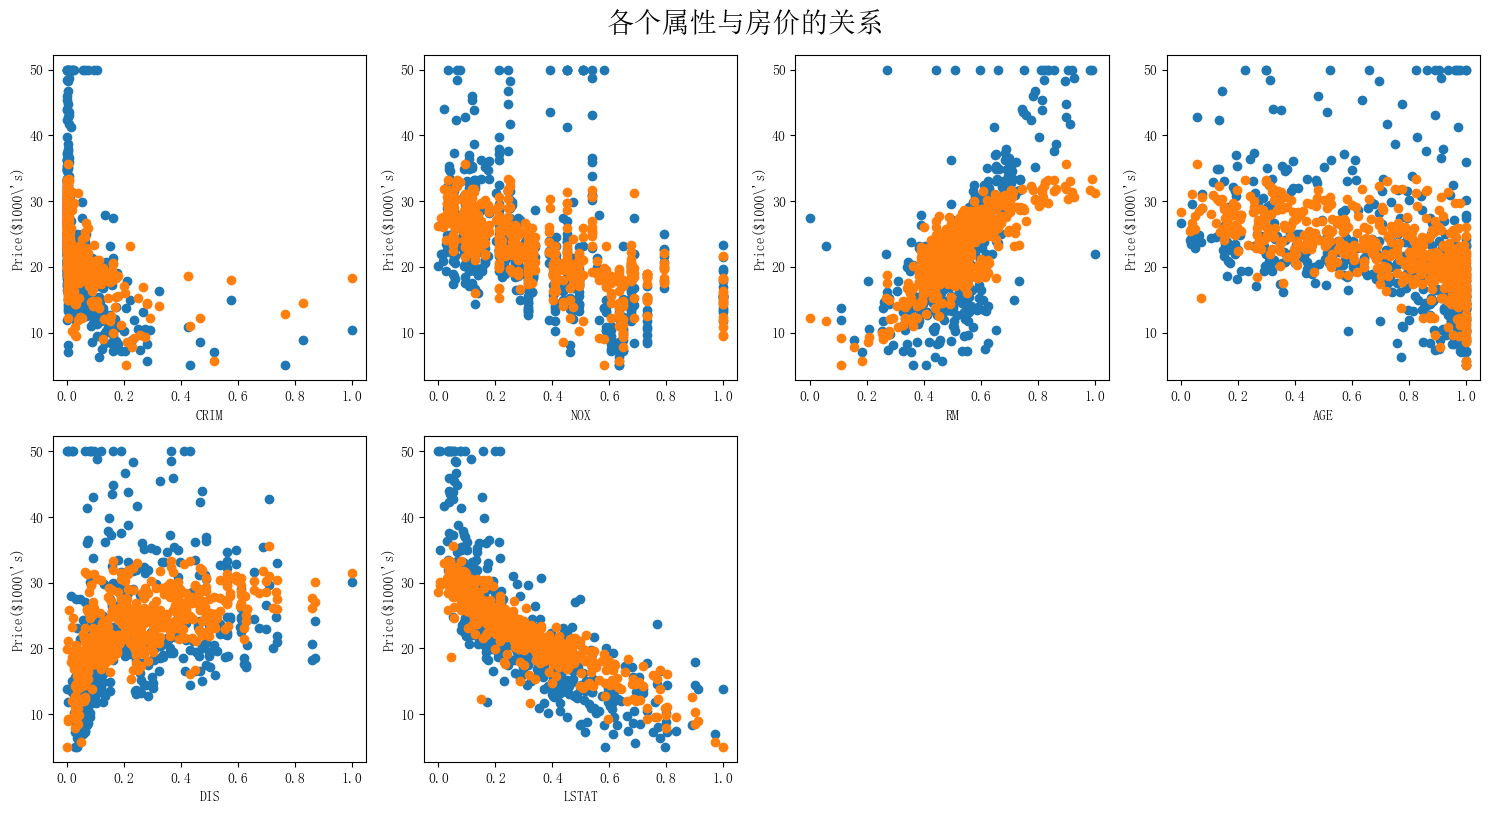

(506, 6)


In [69]:
# 创建包含每个属性与房价之间关系的散点图
plt.figure(figsize=(15, 15))
for i, feature_name in enumerate(selected_feature_names, start=0):
    plt.subplot(4, 4, i+1)  # 划分 4x4的网格
    plt.scatter(selected_x[:, i], y)
    plt.scatter(selected_x[:, i], Pred)
    plt.xlabel(feature_name)
    plt.ylabel("Price($1000\\'s)")
plt.tight_layout()
plt.suptitle("各个属性与房价的关系", x=0.5, y=1.02, fontsize=20)
plt.show()
print(selected_x.shape)

[[6.3200e-03 5.3800e-01 6.5750e+00 6.5200e+01 4.0900e+00 4.9800e+00]
 [2.7310e-02 4.6900e-01 6.4210e+00 7.8900e+01 4.9671e+00 9.1400e+00]
 [2.7290e-02 4.6900e-01 7.1850e+00 6.1100e+01 4.9671e+00 4.0300e+00]
 ...
 [6.0760e-02 5.7300e-01 6.9760e+00 9.1000e+01 2.1675e+00 5.6400e+00]
 [1.0959e-01 5.7300e-01 6.7940e+00 8.9300e+01 2.3889e+00 6.4800e+00]
 [4.7410e-02 5.7300e-01 6.0300e+00 8.0800e+01 2.5050e+00 7.8800e+00]]


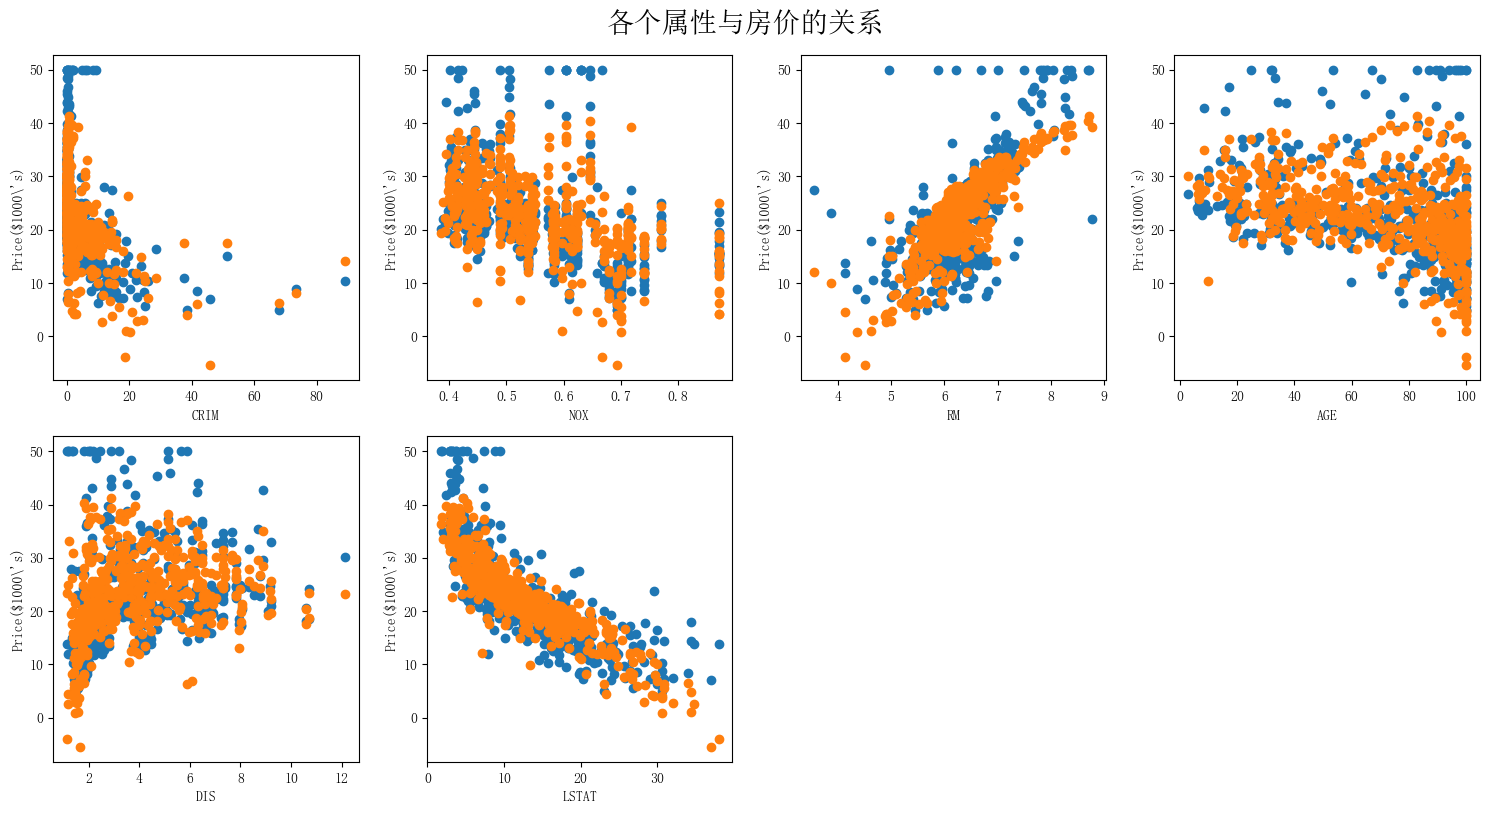

In [65]:
select = [0,4,5,6,7,12]
selected_x = data[:, select]    # 选择LSTAT属性
print(selected_x)
y = target  # 目标变量（房价）

# 特征名称
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
selected_feature_names = [feature_names[i] for i in select]

model = LinearRegression()
model.fit(selected_x, y)

# 预测
Pred = model.predict(selected_x)
# 创建包含每个属性与房价之间关系的散点图
plt.figure(figsize=(15, 15))
for i, feature_name in enumerate(selected_feature_names, start=0):
    plt.subplot(4, 4, i+1)  # 划分 4x4的网格
    plt.scatter(selected_x[:, i], y)
    plt.scatter(selected_x[:, i], Pred)
    plt.xlabel(feature_name)
    plt.ylabel("Price($1000\\'s)")
plt.tight_layout()
plt.suptitle("各个属性与房价的关系", x=0.5, y=1.02, fontsize=20)
plt.show()

⑷ 对要求 ⑴、⑵、⑶所创建的模型，调整学习率、迭代次数等超参数，观察并记录在训练集和测试集上的均方差损失、模型训练/运行时间等，以表格或其他合适的图表形式展示，找出你认为最合适的参数，并说明原因。

In [ ]:
LSTAT = 12
x = data[:, np.newaxis, LSTAT]    # 选择LSTAT属性
y = target  # 目标变量（房价）

alphas = [0.1, 1.0, 10.0]
max_iter_list = [100, 500, 1000]




